In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
from zipfile import ZipFile
file_name = "/content/archive.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()
    print('Done')

Done


In [ ]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
for i in range(1,99):
    y.append('N')

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

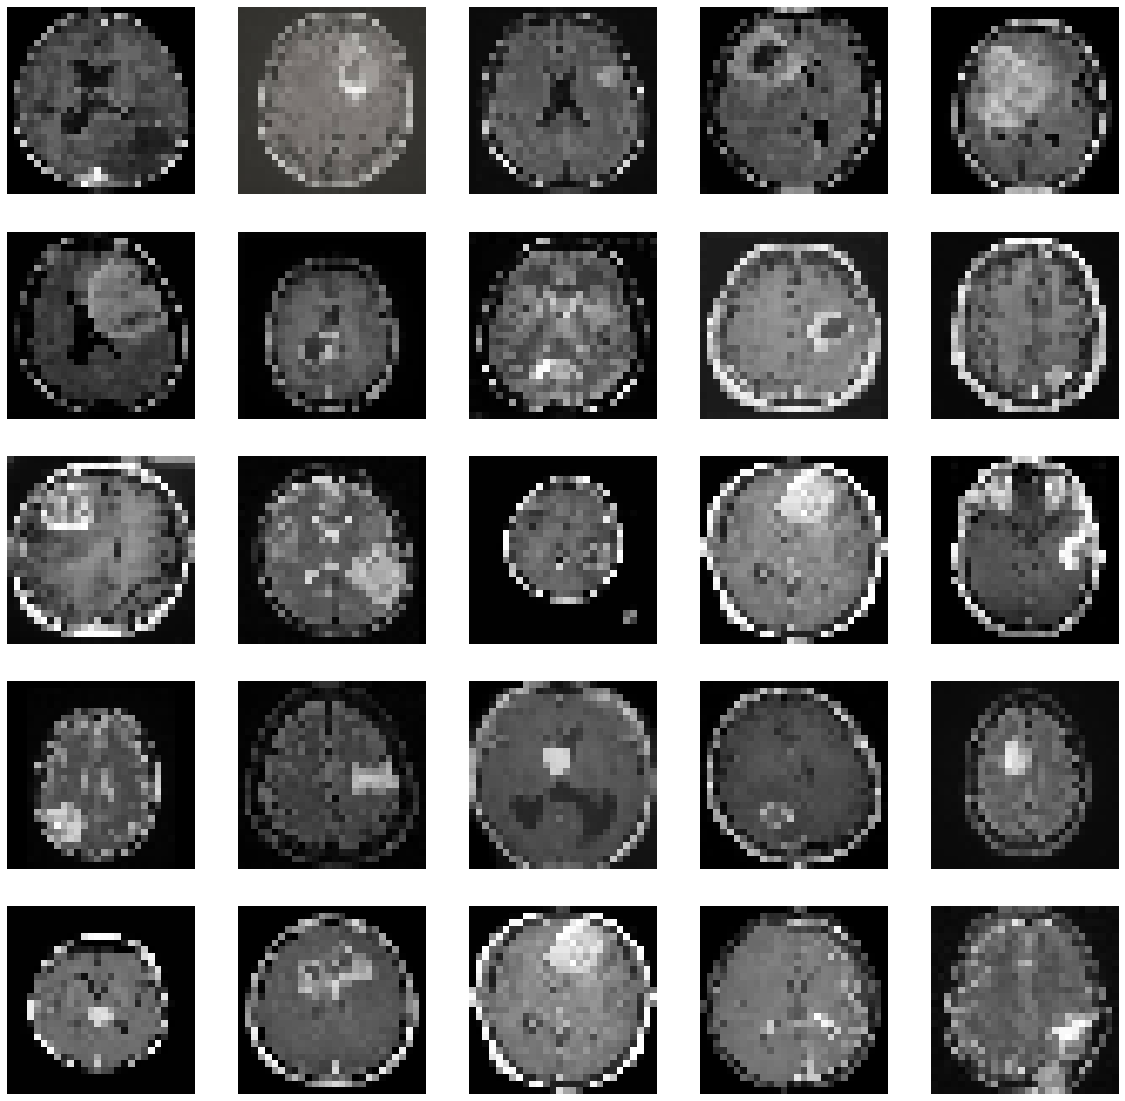

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [ ]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)

X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)


In [ ]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (28,28,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (28, 28, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                        

In [ ]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = m1.fit(X_train,y_train,
                    epochs=25, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/25
6/6 [==============================] - 10s 107ms/step - loss: 0.6654 - accuracy: 0.6154 - val_loss: 1.3066 - val_accuracy: 0.6071
Epoch 2/25
6/6 [==============================] - 0s 19ms/step - loss: 0.6256 - accuracy: 0.6154 - val_loss: 1.3323 - val_accuracy: 0.6071
Epoch 3/25
6/6 [==============================] - 0s 16ms/step - loss: 0.6009 - accuracy: 0.6805 - val_loss: 1.5432 - val_accuracy: 0.6071
Epoch 4/25
6/6 [==============================] - 0s 17ms/step - loss: 0.5458 - accuracy: 0.7041 - val_loss: 0.5047 - val_accuracy: 0.7738
Epoch 5/25
6/6 [==============================] - 0s 17ms/step - loss: 0.5365 - accuracy: 0.7337 - val_loss: 1.1559 - val_accuracy: 0.6071
Epoch 6/25
6/6 [==============================] - 0s 18ms/step - loss: 0.4481 - accuracy: 0.8166 - val_loss: 0.7368 - val_accuracy: 0.7381
Epoch 7/25
6/6 [==============================] - 0s 20ms/step - loss: 0.4278 - accuracy: 0.8521 - val_loss: 0.6074 - val_accuracy: 0.7500
Epoch 8/25
6/6 [=========

3/3 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.8929


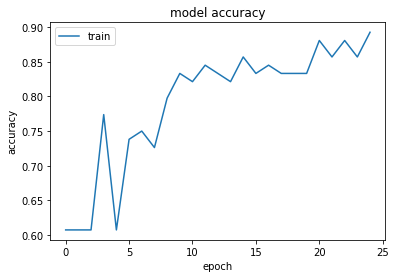

In [ ]:
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

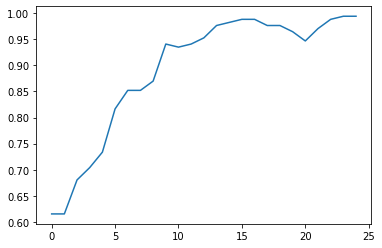

In [ ]:
plt.plot(history.history['accuracy'])

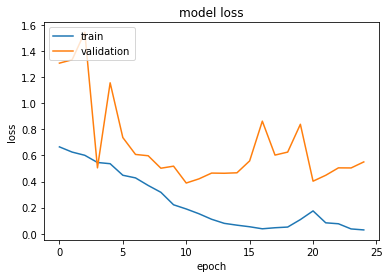

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_predicted = m1.predict

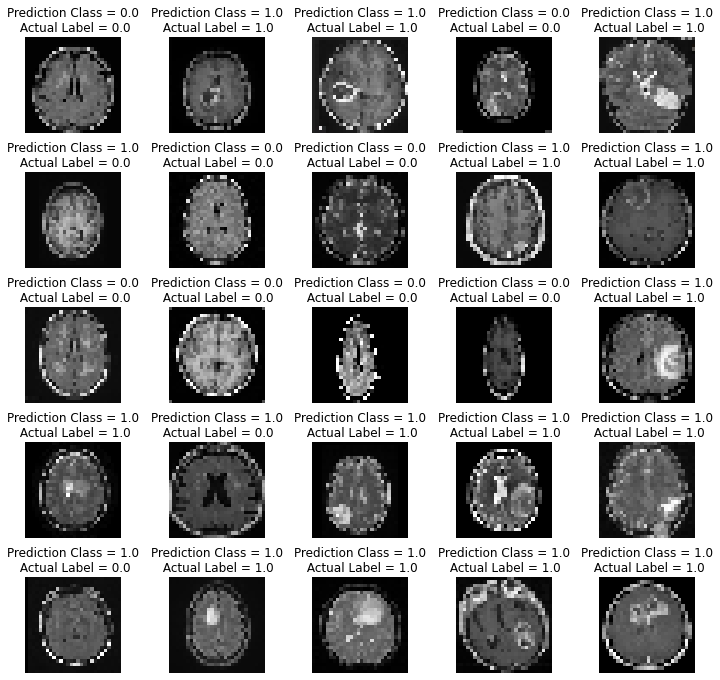

In [ ]:
y_predicted=np.argmax(m1.predict(X_test),axis=1)
y_actual=np.argmax(y_test,axis=1)
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)